# Problem Statement

### Business Understanding
When a person applies for a loan, there are **two types of decisions** that could be taken by the company: 
1. **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:
-  **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)
-  **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
-  **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
2. **Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

We have to work for a **consumer finance company** which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two **types of risks** are associated with the bank’s decision:
-  If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company.
-  If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company.

#### Following problems must be addressed in this case study:
1. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
2. In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
3. Find the facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
4. Identify risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
5. Find **driving factors (or driver variables)** behind loan default to understand better for a company, i.e. the variables which are strong indicators of default.  The company has to utilise this knowledge for its portfolio and risk assessment. 

In [1]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [2]:
# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read CSV file and it's attributes.
# Reading CSV file with dtype object.
loan = pd.read_csv('loan.csv', dtype=object)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [5]:
# check shape
loan.shape

(39717, 111)

In [6]:
# check datatype of loan data
loan.dtypes

id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object

## Data Preparation
- The objective is to identify the applicant who are likely default, so we eliminate data related to current customer
- Removal of Empty Rows and Column
- Removal of data column which is not relevent to the analysis

In [7]:
# find duplicate values in rows
loan.duplicated().sum()

# No duplicate values in row

0

In [8]:
# find number of empty rows
loan.isnull().all(axis='columns').sum()

# No empty rows

0

In [9]:
# find number of empty columns
loan.isnull().all(axis='index').sum()

54

In [10]:
# find missing values in columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### we can notice there are many empty columns which is not going to contribute any analysis

In [11]:
# Drop those columns where all values are null.
loan = loan.dropna(axis='columns', how='all')

In [12]:
loan.isnull().all(axis='index').sum()

0

In [13]:
# find remianing missing values in columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [14]:
loan.shape

(39717, 57)

### Removing Non relevant fields from the dataset

### After removing empty columns we have 56 fields out of 111 fields
- Further looking the data fields there are many fields having same data values which may not reflect any contribution to analysis. so we will remove them.
- The unique value fields are 'pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'.

In [15]:
print(loan.pymnt_plan.unique())
print(loan.initial_list_status.unique())
print(loan.collections_12_mths_ex_med.unique())
print(loan.policy_code.unique())
print(loan.acc_now_delinq.unique())
print(loan.application_type.unique())
print(loan.pub_rec_bankruptcies.unique())
print(loan.tax_liens.unique())
print(loan.delinq_amnt.unique())

['n']
['f']
['0' nan]
['1']
['0']
['INDIVIDUAL']
['0' '1' '2' nan]
['0' nan]
['0']


In [16]:
# Removing fields which has same values throughout the length identified from source data
loan.drop(['pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,1037.39,0,0,0,May-16,67.79,Jun-16,May-16,0,0


### From the Data Dictionary we can further eliminate the following fields which may not useful
- 'id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'last_credit_pull_d', 'addr_state','desc', 'next_pymnt_d'

In [17]:
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc", "next_pymnt_d"], axis = 1, inplace = True)

In [18]:
print(loan.shape)

(39717, 39)


In [19]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies'],
      dtype='object')

### Post process data can be eliminated, because they can't be useful for default prediction
- total_pymnt, 
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- chargeoff_within_12_mths
- delinq_2yrs

### So the above fields can be removed from data analysis

In [20]:
loan.drop(["total_pymnt", "delinq_2yrs", "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","chargeoff_within_12_mths"], axis = 1, inplace = True)

In [21]:
loan.shape

(39717, 29)

### Standardization of data
- 'revol_util', 'int_rate' fields has values but datatype considered as object because it having "%" Symbol
- 'emp_length' field also being as datatype object it can be converted in to numeric

In [22]:
# Remove % symbol from intrest rate column 
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

# Remove % symbol from revol_util column
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [23]:
# Change employment length column to have only numbers and fill NA to '0' values
loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')

#### From above we have converted object data to numeric data to utlise in analysis

In [24]:
colmns = ['loan_amnt','funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'revol_util', 'total_pymnt_inv', 'pub_rec_bankruptcies', 'total_acc']
loan[colmns] = loan[colmns].apply(pd.to_numeric)

### Here while looking the percentage of missing we take following decision
- "mths_since_last_delinq", "mths_since_last_record" has more than 50% of missing so we can remove them

In [25]:
# Drop those columns that have mostly missing values.
columns_drop_list1 = ["mths_since_last_delinq","mths_since_last_record"]
loan.drop(columns_drop_list1, axis ='columns', inplace=True)

In [26]:
loan.shape

(39717, 27)

In [27]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,1,3,0,13648,83.7,9,0,0,5833.84,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,5,3,0,1687,9.4,4,0,0,1008.71,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,2,2,0,2956,98.5,10,0,0,3005.67,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,1,10,0,5598,21.0,37,0,0,12231.89,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,...,0,15,0,27783,53.9,38,524.06,524.06,3513.33,0.0


In [28]:
# find remianing missing values in columns
pd.isnull(loan).sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
out_prncp                 0
out_prncp_inv             0
total_pymnt_inv           0
pub_rec_bankruptcies    697
dtype: int64

### Importing of NaN values
- Import missing values in "pub_rec_bankruptcies" and "revol_util" coulumns with most frequent value

In [29]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [30]:
# Impute missing values in pub_rec_bankruptcies column with most frequency values
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].mode()[0])

In [31]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [32]:
# find remianing missing values in columns
pd.isnull(loan).sum()

loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
dti                      0
earliest_cr_line         0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util              50
total_acc                0
out_prncp                0
out_prncp_inv            0
total_pymnt_inv          0
pub_rec_bankruptcies     0
dtype: int64

In [33]:
loan['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [34]:
loan['revol_util'].value_counts()

0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64

In [35]:
loan.fillna(loan['revol_util'].mean())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,1,3,0,13648,83.7,9,0,0,5833.84,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,5,3,0,1687,9.4,4,0,0,1008.71,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,2,2,0,2956,98.5,10,0,0,3005.67,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,1,10,0,5598,21.0,37,0,0,12231.89,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,...,0,15,0,27783,53.9,38,524.06,524.06,3513.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4,MORTGAGE,...,0,13,0,7274,13.1,40,0,0,1213.88,0.0
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3,RENT,...,1,6,0,8847,26.9,9,0,0,1020.51,0.0
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,1,MORTGAGE,...,0,11,0,9698,19.4,20,0,0,1397.12,0.0
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,1,MORTGAGE,...,0,17,0,85607,0.7,26,0,0,672.66,0.0


In [36]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
inq_last_6mths           object
open_acc                 object
pub_rec                  object
revol_bal                object
revol_util              float64
total_acc                 int64
out_prncp                object
out_prncp_inv            object
total_pymnt_inv         float64
pub_rec_bankruptcies    float64
dtype: object

In [37]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,1,3,0,13648,83.7,9,0,0,5833.84,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,5,3,0,1687,9.4,4,0,0,1008.71,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,2,2,0,2956,98.5,10,0,0,3005.67,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,1,10,0,5598,21.0,37,0,0,12231.89,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,...,0,15,0,27783,53.9,38,524.06,524.06,3513.33,0.0


### The objective is to identify the applicant who are likely default, so we eliminate data related to current customer

In [38]:
# find number of loan status in percentage
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [39]:
# As we are going to analysis fully paid and charged off loan status 
# so drop those Applicants who are in the process of paying the instalments i.e., current loan status (only)
loan = loan[~(loan['loan_status'] == 'Current')]

#Verify the Current type is removed 
print(loan.loan_status.unique())
print(loan.shape)

['Fully Paid' 'Charged Off']
(38577, 27)


#### From the above result we can confirm we have removed data related to current customer

### We have completed 
- data preparation 
- data cleaning and standardization
- missing values imputation
further we have to check for the ouliers in the data

### Considering below fields for further analysis which has meaning full relation with case
- annual_inc
- dti
- emp_length
- home_ownership
- installment
- int_rate
- loan_amnt
- loan_status
- purpose
- term
- total_acc

## Outlier treatment

In [40]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38527.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,4.925526,6.877797e+04,13.272727,48.702777,22.052648,11271.196153,0.042694
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,3.453921,6.421868e+04,6.673044,28.364741,11.425861,8700.845592,0.202809
min,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,25.200000,13.000000,5019.590000,0.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,49.100000,20.000000,9066.660000,0.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,72.300000,29.000000,15329.780000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,99.900000,90.000000,58563.680000,2.000000


### Outlier Check with "loan_amnt"

In [41]:
loan.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

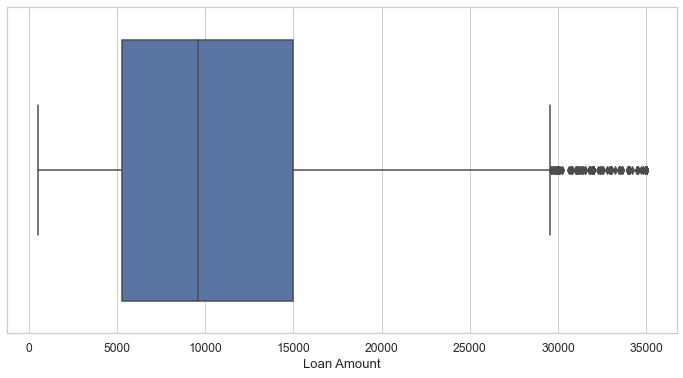

In [42]:
sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.1, style='whitegrid')

sns.boxplot(loan['loan_amnt'])
plt.xlabel("Loan Amount")
plt.show()

#### Even "Loan Amount" having outliers they are minor and mostly contineous so no need to process

### Outlier Check with "Annual_inc"

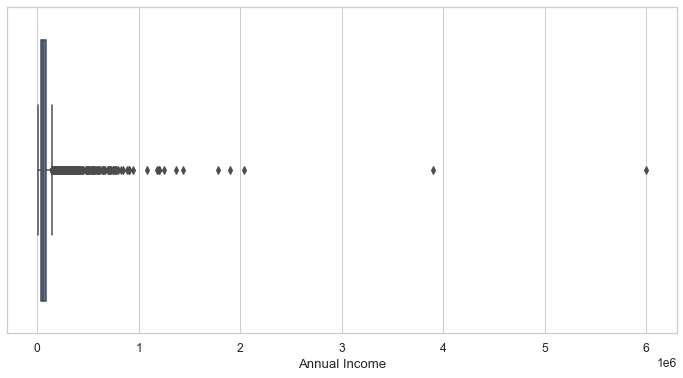

In [43]:
sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.1, style='whitegrid')
sns.boxplot(loan['annual_inc'])
plt.xlabel("Annual Income")
plt.show()

#### Here The outlier distribution is random and more and to be removed
- we will check the quantile information to know the distribution

In [44]:
quantile_info = loan.annual_inc.quantile([0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.25     40000.0
0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

#### The distribution is more after 95 % of quantile
- we will remove data those are in above 95% Quantile

In [45]:
# getting the Threshold value for 95% quantile
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
print(per_95_annual_inc)

140004.0


In [46]:
# Cutting the data which above 140004.0
loan = loan[loan.annual_inc <= per_95_annual_inc]

#### Now the Outliers data are cleaned for "annual_inc", let us see the chart again

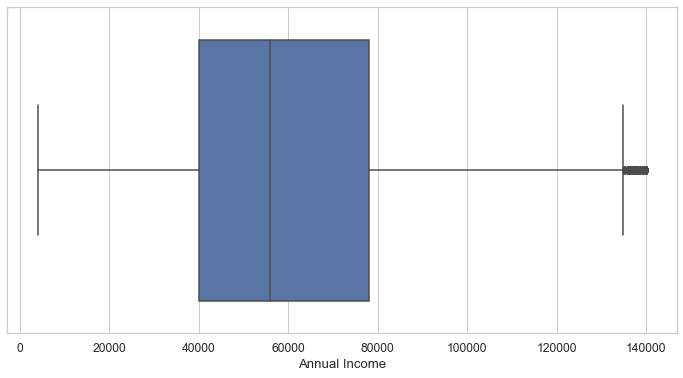

In [47]:
sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.1, style='whitegrid')
sns.boxplot(loan['annual_inc'])
plt.xlabel("Annual Income")
plt.show()

#### We can observe the outliers are cleaned significantly

### Checking for outliers at "dti"

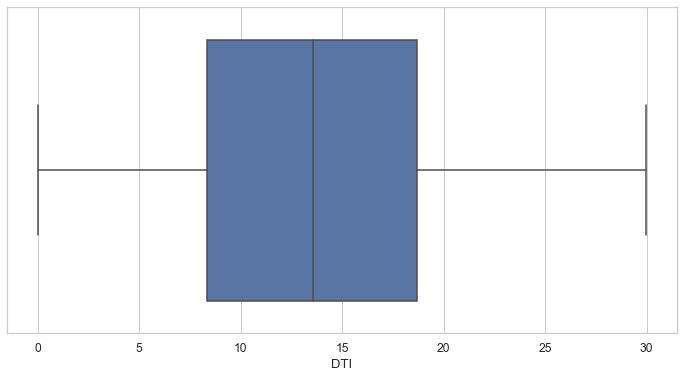

In [48]:
sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.1, style='whitegrid')
sns.boxplot(loan['dti'])
plt.xlabel("DTI")
plt.show()

### Checking Outliers at "int_rate"

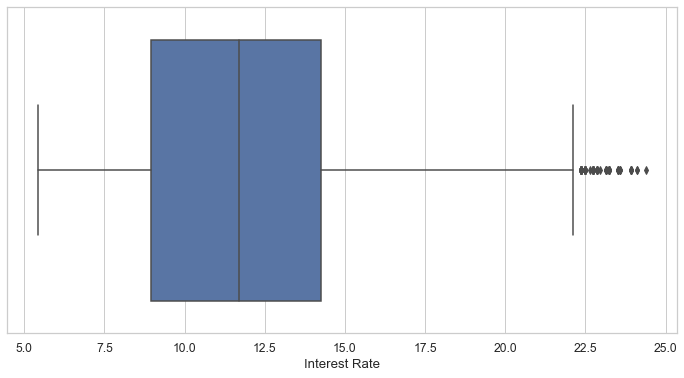

In [49]:
sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.1, style='whitegrid')
sns.boxplot(loan['int_rate'])
plt.xlabel("Interest Rate")
plt.show()

### Checking Outliers at "total_acc"

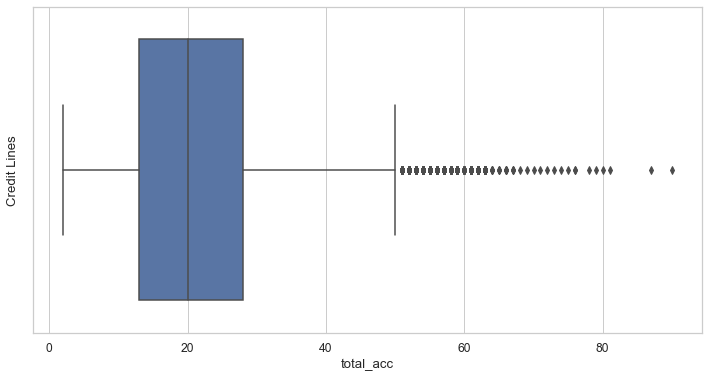

In [50]:
sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.1, style='whitegrid')
sns.boxplot(loan['total_acc'])
plt.ylabel("Credit Lines")
plt.show()

In [51]:
quantile_info = loan.total_acc.quantile([0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.25    13.0
0.50    20.0
0.75    28.0
0.90    37.0
0.95    43.0
0.97    47.0
0.98    50.0
0.99    55.0
Name: total_acc, dtype: float64

#### The distribution seems contineous and uniform, so we keeping as it is

# Visual Analysis

## Univariate Analysis

In [52]:
# Basic statistics for Quantitative Variables using describe()
loan.describe()

# Analysis - 
# 1. It is clear that 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated statistically.
# 2. It is clear that 'total_pymnt' & 'total_pymnt_inv' are closely interrelated statistically.

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies
count,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36606.000000,36654.000000,36654.000000,36654.000000
mean,10682.249550,10436.144077,9894.181349,11.888080,311.888682,4.883805,60855.751621,13.446725,48.659741,21.641349,10869.463173,0.043897
std,7048.414166,6800.636737,6730.756232,3.667257,199.230096,3.443279,27750.284125,6.661899,28.282836,11.232836,8302.146201,0.205533
min,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5000.000000,5000.000000,4975.000000,8.940000,163.080000,2.000000,40000.000000,8.350000,25.300000,13.000000,4897.045000,0.000000
50%,9250.000000,9000.000000,8375.000000,11.710000,270.420000,4.000000,56000.000000,13.580000,49.000000,20.000000,8807.575000,0.000000
75%,15000.000000,14400.000000,13623.731415,14.270000,408.480000,8.000000,77970.500000,18.710000,72.100000,28.000000,14766.850000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,140004.000000,29.990000,99.900000,90.000000,58563.680000,2.000000


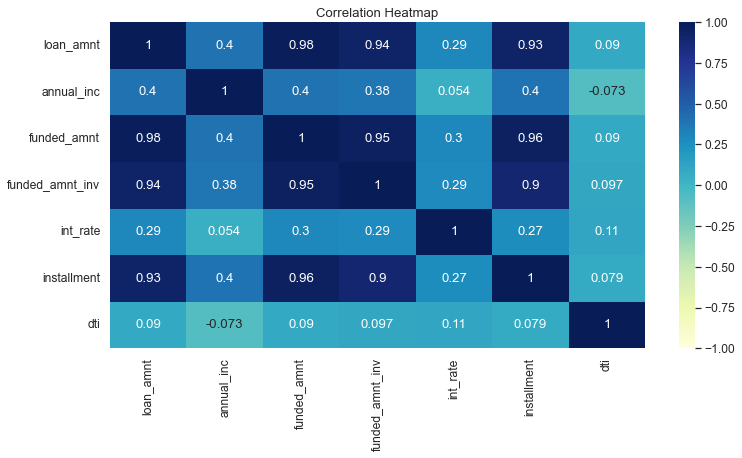

In [53]:
# Heat map for to check correlation between features
cols_for_corr = ["loan_amnt", "annual_inc", "funded_amnt", "funded_amnt_inv", "term", "int_rate", "loan_status", "installment", "dti"]
loan_corr = loan[cols_for_corr].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Analysis -
# Loan amount in highly correlated with Funded amount and Funded amount for investment.
# DTI is low correlated with all mentioned variables.

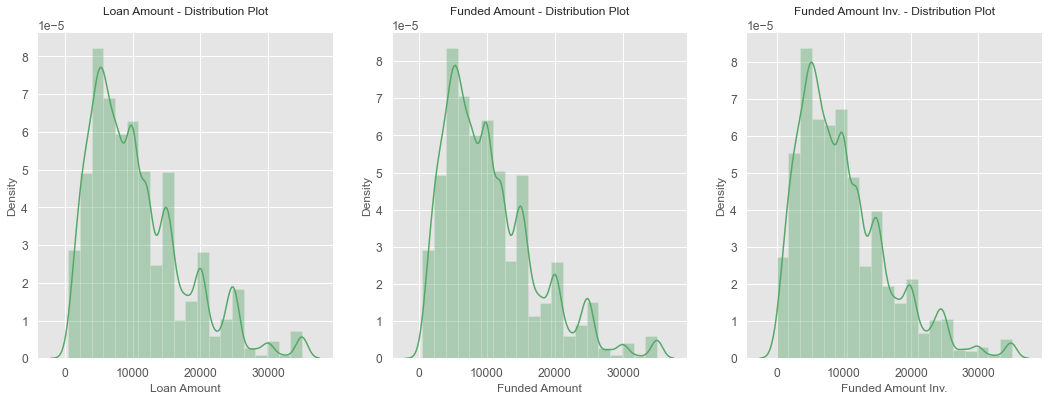

In [54]:
# Distribution of 'loan_amnt','funded_amnt' & 'funded_amnt_inv' using distribution plots.

plt.figure(figsize=[18,6])
plt.style.use("ggplot")
# subplot 1
plt.subplot(1, 3, 1)
sns.distplot(loan['loan_amnt'],bins = 20, color='g', kde=True)
plt.title('Loan Amount - Distribution Plot\n',fontsize=12)
plt.xlabel('Loan Amount',fontsize=12)
# subplot 2
plt.subplot(1, 3, 2)
sns.distplot(loan['funded_amnt'],bins = 20, color='g')
plt.title('Funded Amount - Distribution Plot\n',fontsize=12)
plt.xlabel('Funded Amount',fontsize=12)
# subplot 3
plt.subplot(1, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],bins = 20, color='g')
plt.title('Funded Amount Inv. - Distribution Plot\n',fontsize=12)
plt.xlabel('Funded Amount Inv.',fontsize=12)
plt.show()

### Understanding the proportion of defaulters

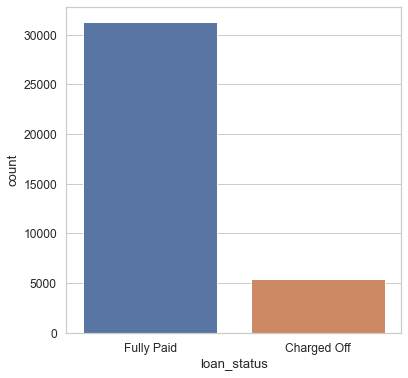

In [55]:
# Loan Status - Categorical Variables
sns.set(rc={'figure.figsize':(6,6)}, font_scale=1.1, style='whitegrid')
sns.countplot(x = 'loan_status', data = loan)   
plt.show()

# Analysis - 
# Most of loan status is fully paid. Approximated 5K applicants are not paying installments on time.

#### Most of loan status is fully paid. Approximated 5K applicants are not paying installments on time.

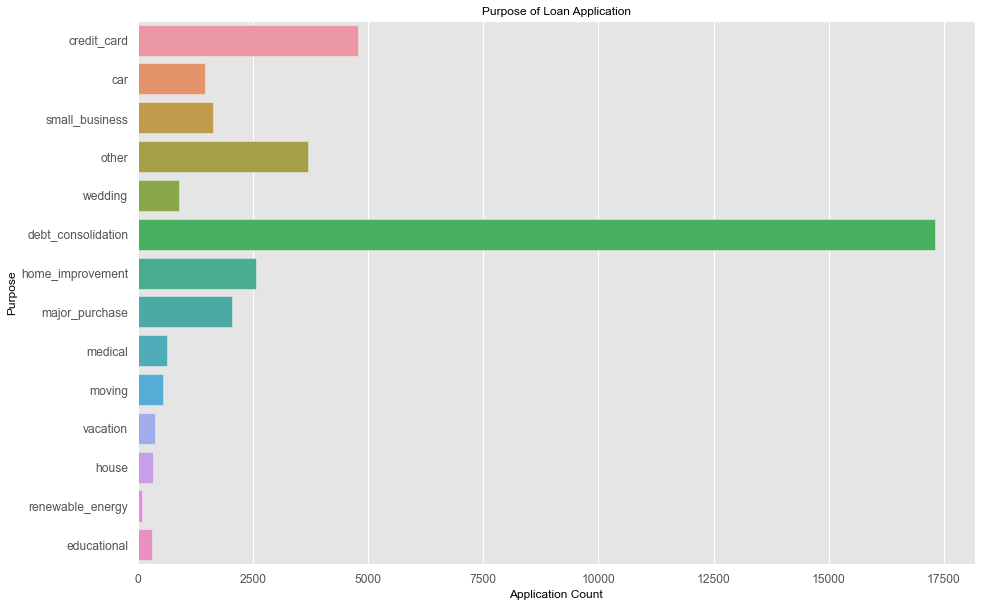

In [56]:
# Purpose - Categorical Variables

plt.figure(figsize=[15,10])
plt.style.use("ggplot")
sns.countplot(y="purpose",data=loan)
plt.title('Purpose of Loan Application',fontsize=12,color='Black')
plt.xlabel('Application Count',fontsize=12,color = 'Black')
plt.ylabel('Purpose',fontsize=12,color = 'Black')   
plt.show()

# Analysis - 
# Most of applicants are taking loan for debt_consolidation.

#### Most of applicants are taking loan for debt_consolidation.

### Category of Defaulters to get loan on their Purpose 

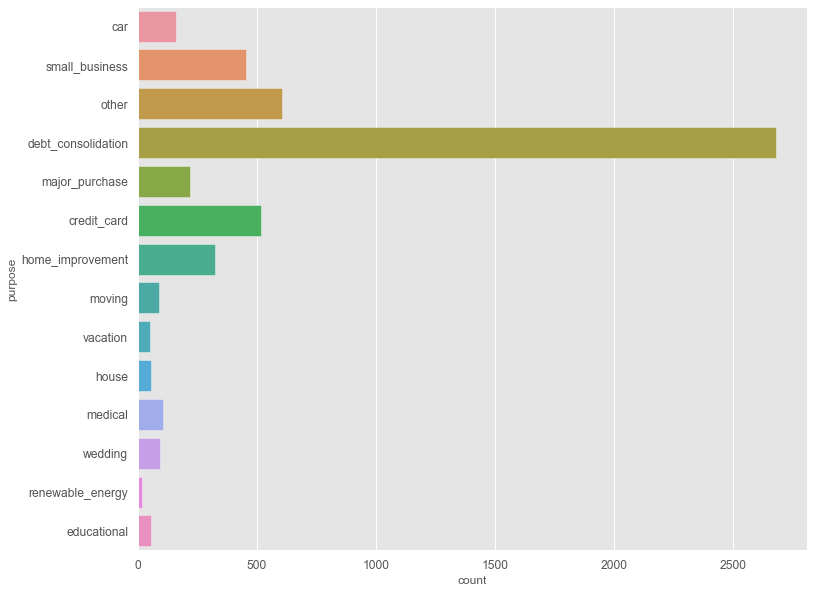

In [57]:
fig, ax = plt.subplots(figsize = (12,10))
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])
plt.show()

# Analysis - 
# Most of applicants who are defaulters, also are taking loan for debt_consolidation.

#### Most of applicants who are defaulters, also are taking loan for debt_consolidation.

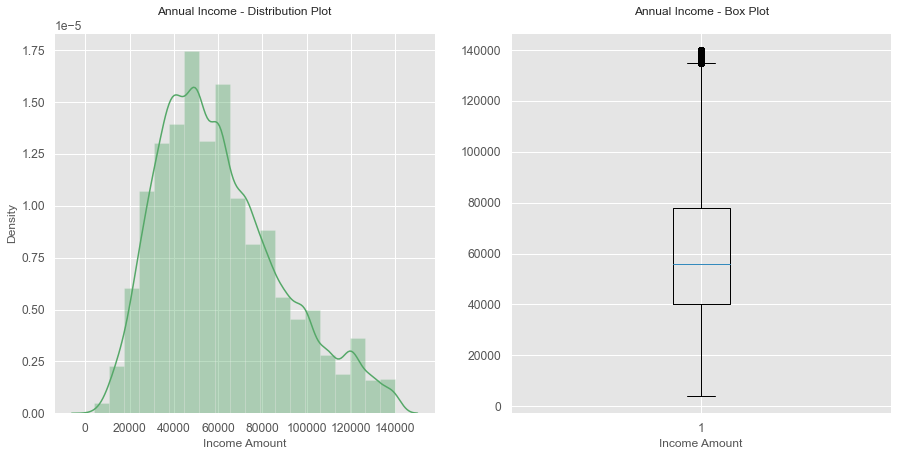

In [59]:
# Distribution of Annual Income using distribution plot and Box plot.
plt.figure(figsize=[15,7])
plt.style.use("ggplot")
# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(loan['annual_inc'],bins = 20, color='g', kde=True)
plt.title('Annual Income - Distribution Plot\n',fontsize=12)
plt.xlabel('Income Amount',fontsize=12)
# subplot 2
plt.subplot(1, 2, 2)
plt.boxplot(x=loan['annual_inc'])
plt.title('Annual Income - Box Plot\n',fontsize=12)
plt.xlabel('Income Amount',fontsize=12)
plt.show()

# Analysis -
# Most of the applicant's Annual incomes are in range of 40000- 80000

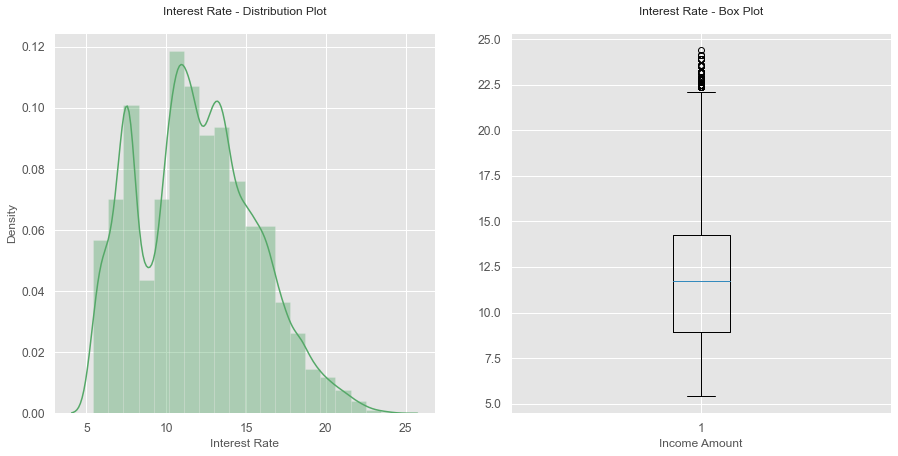

In [60]:
# Distribution of Interest Rate using distribution plot and Box plot.

plt.figure(figsize=[15,7])
plt.style.use("ggplot")
# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(loan['int_rate'],bins = 20, color='g', kde=True)
plt.title('Interest Rate - Distribution Plot\n',fontsize=12)
plt.xlabel('Interest Rate',fontsize=12)
# subplot 2
plt.subplot(1, 2, 2)
plt.boxplot(x=loan['int_rate'])
plt.title('Interest Rate - Box Plot\n',fontsize=12)
plt.xlabel('Income Amount',fontsize=12)
plt.show()

# Analysis -
# Most of the interest rates are in range of 9% - 14%

## Segmented Univariate

In [61]:
loan_FullyPaid = loan[loan['loan_status'] == 'Fully Paid']
loan_ChargedOff = loan[loan['loan_status'] == 'Charged Off']

In [62]:
loan_FullyPaid.shape
loan_FullyPaid.shape

(31236, 27)

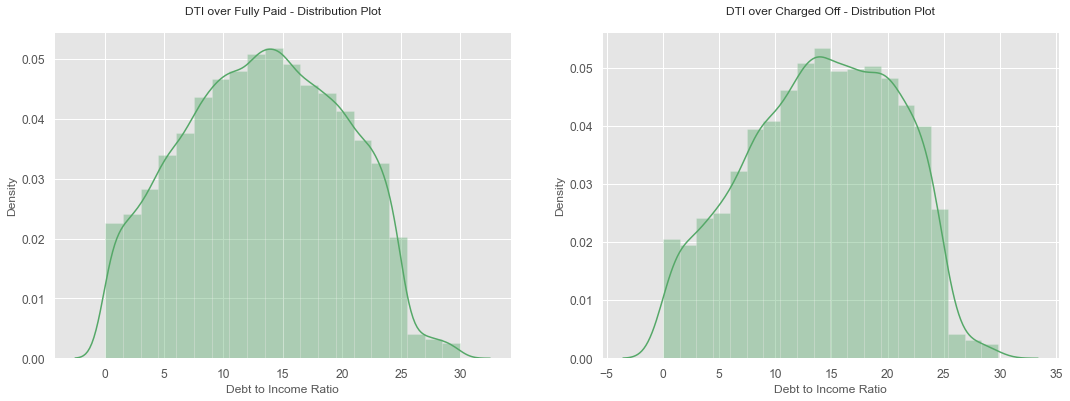

In [63]:
# Distribution of DTI over Fully Paid and Charged Off Applicants

plt.figure(figsize=[18,6])
plt.style.use("ggplot")
plt.subplot(1, 2, 1)
sns.distplot(loan_FullyPaid['dti'],bins = 20, color='g', kde=True)
plt.title('DTI over Fully Paid - Distribution Plot\n',fontsize=12)
plt.xlabel('Debt to Income Ratio',fontsize=12)
# subplot 2
plt.subplot(1, 2, 2)
sns.distplot(loan_ChargedOff['dti'],bins = 20, color='g')
plt.title('DTI over Charged Off - Distribution Plot\n',fontsize=12)
plt.xlabel('Debt to Income Ratio',fontsize=12)
plt.show()

# Analysis -
# Most of Fully Paid Customer has DTI over range 12-15.
# Most of Charged Off Customer has fell over range 14-15.

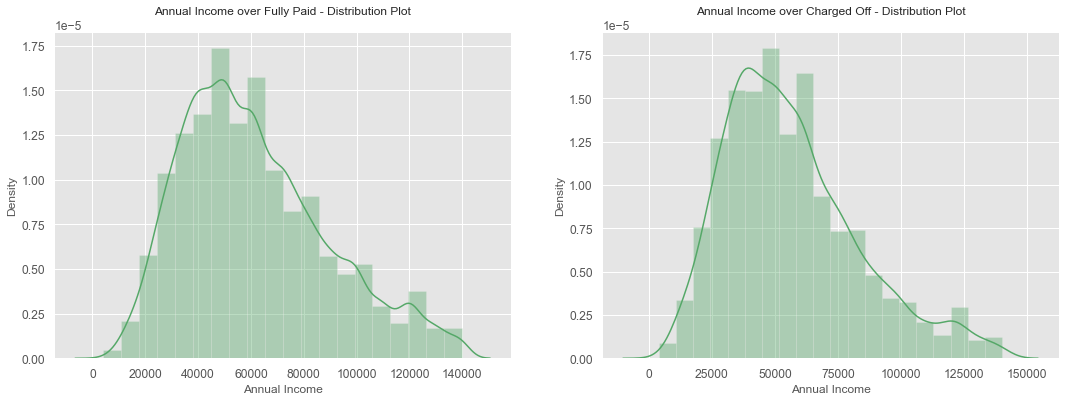

In [64]:
# Distribution of Annual Income over Fully Paid and Charged Off Applicants

plt.figure(figsize=[18,6])
plt.style.use("ggplot")
# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(loan_FullyPaid['annual_inc'],bins = 20, color='g', kde=True)
plt.title('Annual Income over Fully Paid - Distribution Plot\n',fontsize=12)
plt.xlabel('Annual Income',fontsize=12)
# subplot 2
plt.subplot(1, 2, 2)
sns.distplot(loan_ChargedOff['annual_inc'],bins = 20, color='g')
plt.title('Annual Income over Charged Off - Distribution Plot\n',fontsize=12)
plt.xlabel('Annual Income',fontsize=12)
plt.show()

# Analysis -
# Applinacts who are getting 45k-50k salary, they pay full loan amount earlier than others. 
# Applinacts who are getting 45k-50k salary, they have also highly chance that they did noy pay loan amount.

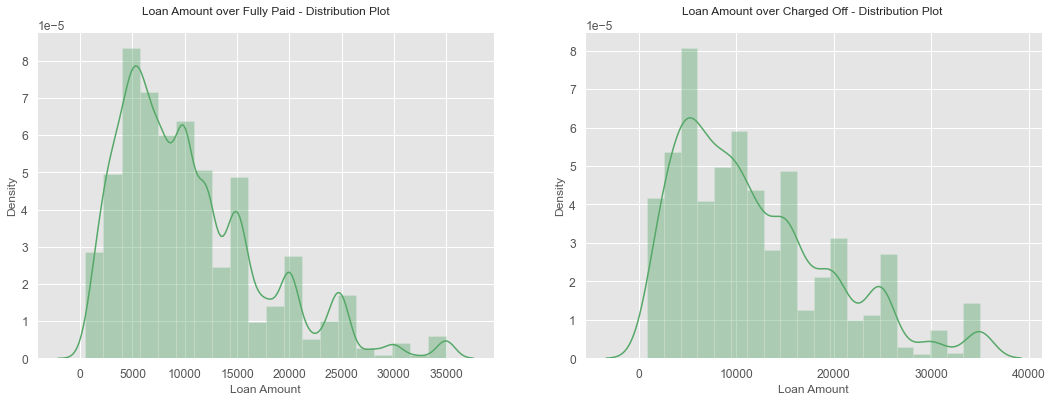

In [65]:
# Distribution of Loan Amount over Fully Paid and Charged Off Applicants

plt.figure(figsize=[18,6])
plt.style.use("ggplot")
# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(loan_FullyPaid['loan_amnt'],bins = 20, color='g', kde=True)
plt.title('Loan Amount over Fully Paid - Distribution Plot\n',fontsize=12)
plt.xlabel('Loan Amount',fontsize=12)
# subplot 2
plt.subplot(1, 2, 2)
sns.distplot(loan_ChargedOff['loan_amnt'],bins = 20, color='g')
plt.title('Loan Amount over Charged Off - Distribution Plot \n',fontsize=12)
plt.xlabel('Loan Amount',fontsize=12)
plt.show()

# Analysis -
# Applinacts who have taken loan amount approximate 5k, they pay full loan amount earlier than others. 
# Applinacts who have taken loan amount approximate 5k, they have highly chance that they did noy pay loan amount also.

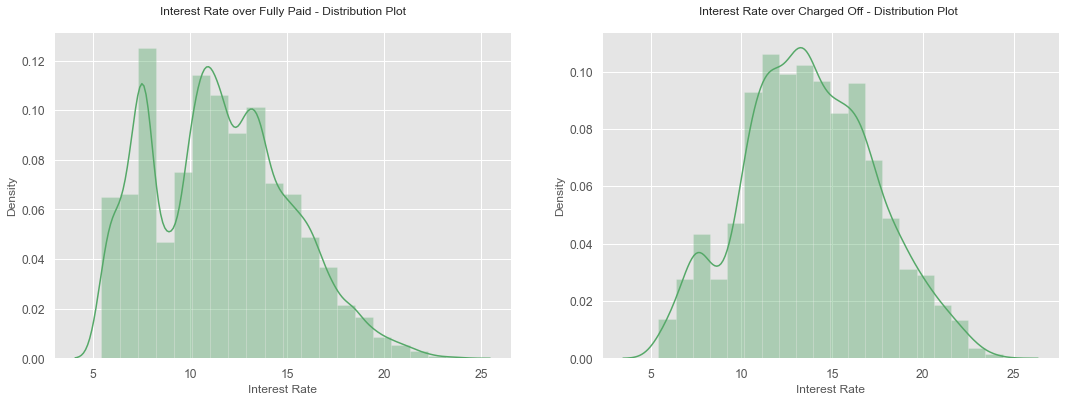

In [66]:
# Distribution of Interest Rate over Fully Paid and Charged Off Applicants

plt.figure(figsize=[18,6])
plt.style.use("ggplot")
# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(loan_FullyPaid['int_rate'],bins = 20, color='g', kde=True)
plt.title('Interest Rate over Fully Paid - Distribution Plot\n',fontsize=12)
plt.xlabel('Interest Rate',fontsize=12)
# subplot 2
plt.subplot(1, 2, 2)
sns.distplot(loan_ChargedOff['int_rate'],bins = 20, color='g')
plt.title('Interest Rate over Charged Off - Distribution Plot \n',fontsize=12)
plt.xlabel('Interest Rate',fontsize=12)
plt.show()

# Analysis -
# Applinacts who have taken loan at ~7.5% interest rate, they pay full loan amount earlier than others. 
# Applinacts who have taken loan at 12% interest rate, they have highly chance that they did noy pay loan amount.

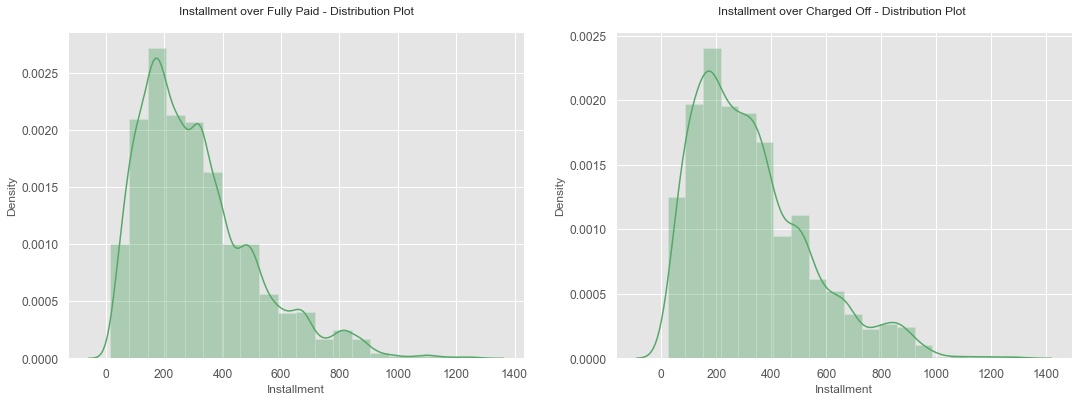

In [67]:
# Distribution of Installment over Fully Paid and Charged Off Applicants

plt.figure(figsize=[18,6])
plt.style.use("ggplot")

# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(loan_FullyPaid['installment'],bins = 20, color='g', kde=True)
plt.title('Installment over Fully Paid - Distribution Plot\n',fontsize=12)
plt.xlabel('Installment',fontsize=12)
# subplot 2
plt.subplot(1, 2, 2)
sns.distplot(loan_ChargedOff['installment'],bins = 20, color='g')
plt.title('Installment over Charged Off - Distribution Plot \n',fontsize=12)
plt.xlabel('Installment',fontsize=12)
plt.show()

# Analysis -
# Applinacts who have to pay in 180-200 installments, 
# they pay full loan amount earlier than others and they are defaulters also.

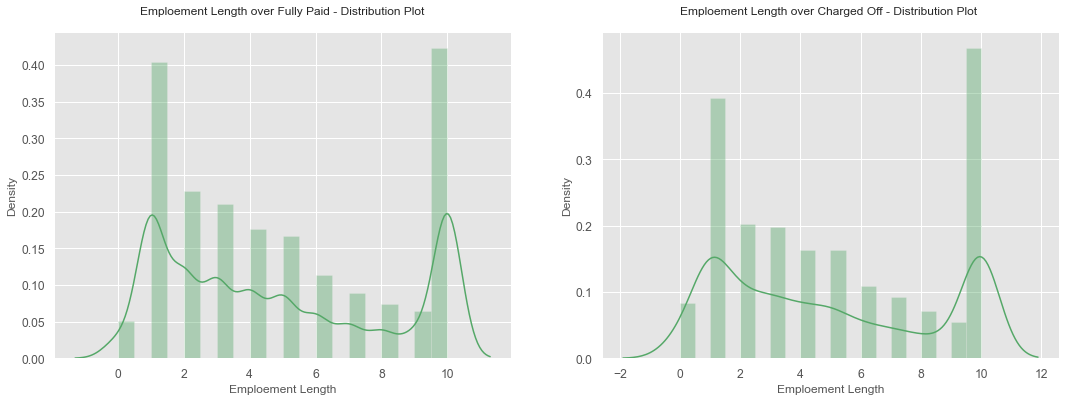

In [68]:
# Distribution of Emploement Length over Fully Paid and Charged Off Applicants

plt.figure(figsize=[18,6])
plt.style.use("ggplot")
# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(loan_FullyPaid['emp_length'],bins = 20, color='g', kde=True)
plt.title('Emploement Length over Fully Paid - Distribution Plot\n',fontsize=12)
plt.xlabel('Emploement Length',fontsize=12)
# subplot 2
plt.subplot(1, 2, 2)
sns.distplot(loan_ChargedOff['emp_length'],bins = 20, color='g')
plt.title('Emploement Length over Charged Off - Distribution Plot \n',fontsize=12)
plt.xlabel('Emploement Length',fontsize=12)
plt.show()

# Analysis -
# Applinacts who have worked approximate 10 year in their job, they pay full loan amount earlier than others. 
# Applinacts who have worked approximate 10 years in their job, they have highly chance that they did noy pay loan amount.

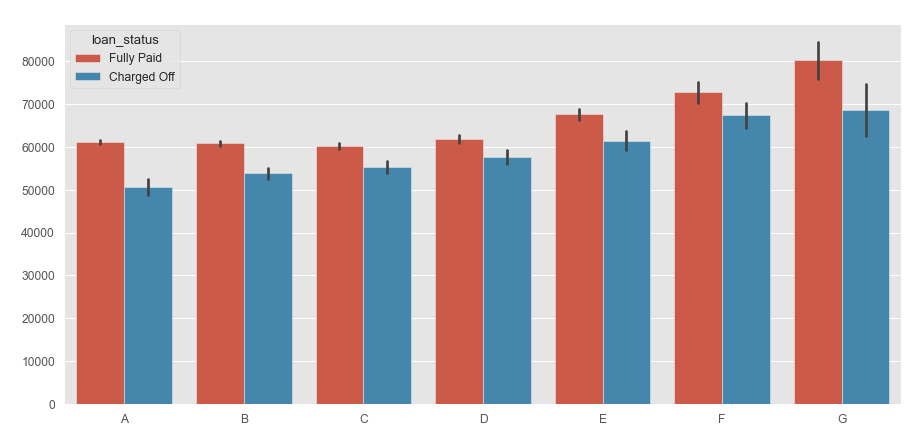

In [69]:
# Distribution of Annual Income across grade for every loan status.

plt.figure(figsize=[15,7])
sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean, order='ABCDEFG')
plt.title('Grade vs Annual income',fontsize=15,color='w')
plt.ylabel('Annual income',fontsize=12,color = 'w')
plt.xlabel('Grades',fontsize=12,color = 'w')
plt.show()

# Analysis -
# Applicants who getting 'charged off' have lower annual incomes than Fully Paid applicants for each and every grade.

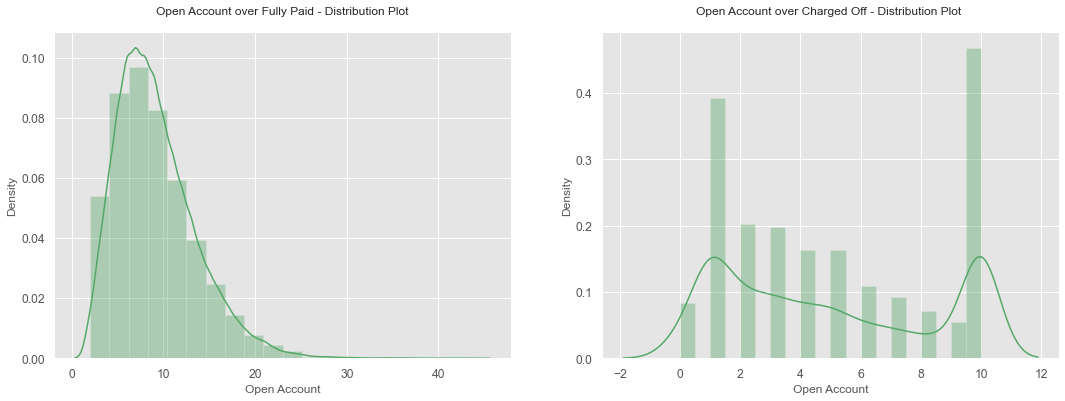

In [70]:
# Distribution of Open Account over Fully Paid and Charged Off Applicants
plt.figure(figsize=[18,6])
plt.style.use("ggplot")
# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(loan_FullyPaid['open_acc'],bins = 20, color='g', kde=True)
plt.title('Open Account over Fully Paid - Distribution Plot\n',fontsize=12)
plt.xlabel('Open Account',fontsize=12)
# subplot 2
plt.subplot(1, 2, 2)
sns.distplot(loan_ChargedOff['emp_length'],bins = 20, color='g')
plt.title('Open Account over Charged Off - Distribution Plot \n',fontsize=12)
plt.xlabel('Open Account',fontsize=12)
plt.show()

# Analysis -
# Applicants who have opened ~8 accounts, it is highly chance that they will pay instalments.
# Applicants who have opened ~10 accounts, it is highly chance that they will be defaulters.

## Bivariate Analysis

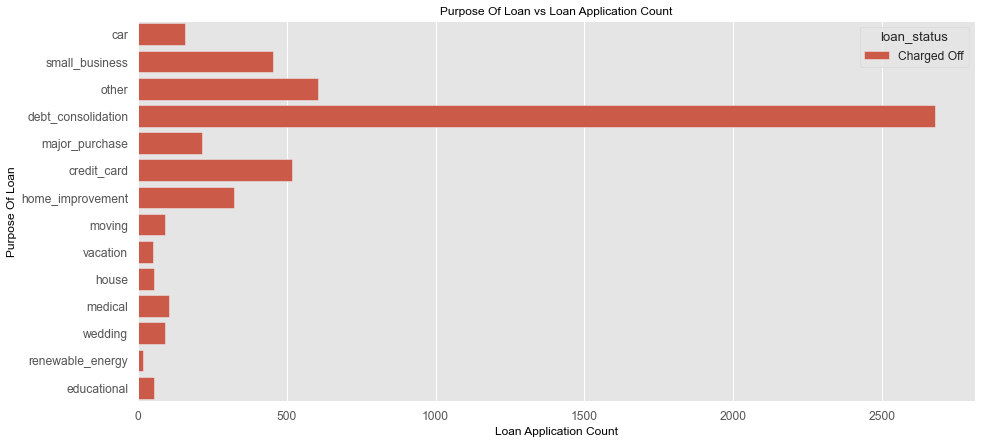

In [71]:
# Bivariate Analysis - Loan Status and purpose

plt.figure(figsize=[15,7])
plt.style.use("ggplot")
sns.countplot(y="purpose",data=loan_ChargedOff,hue='loan_status')
plt.title('Purpose Of Loan vs Loan Application Count',fontsize=12,color='Black')
plt.ylabel('Purpose Of Loan',fontsize=12,color = 'Black')
plt.xlabel('Loan Application Count',fontsize=12,color = 'Black')      
plt.show()

# Analysis -
# Number of chraged off count is high that have taken loan for the purpose of debt_consolidation.

#### Number of chraged off count is high that have taken loan for the purpose of debt_consolidation.

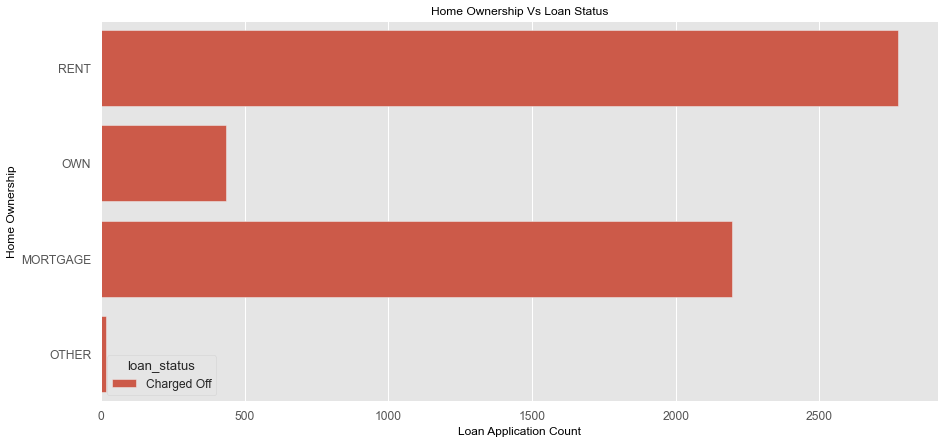

In [72]:
# Bivariate Analysis - Loan Status and Home Ownership

plt.figure(figsize=[15,7])
plt.style.use("ggplot")
sns.countplot(y="home_ownership",data=loan_ChargedOff,hue='loan_status')
plt.title('Home Ownership Vs Loan Status',fontsize=12,color='Black')
plt.ylabel('Home Ownership',fontsize=12,color = 'Black')
plt.xlabel('Loan Application Count',fontsize=12,color = 'Black')      
plt.show()

# Analysis -
# Number of charged off count is high who are living in rented home.

#### Number of charged off count is high who are living in rented home.

In [73]:
loan['term'].value_counts()

 36 months    27721
 60 months     8933
Name: term, dtype: int64

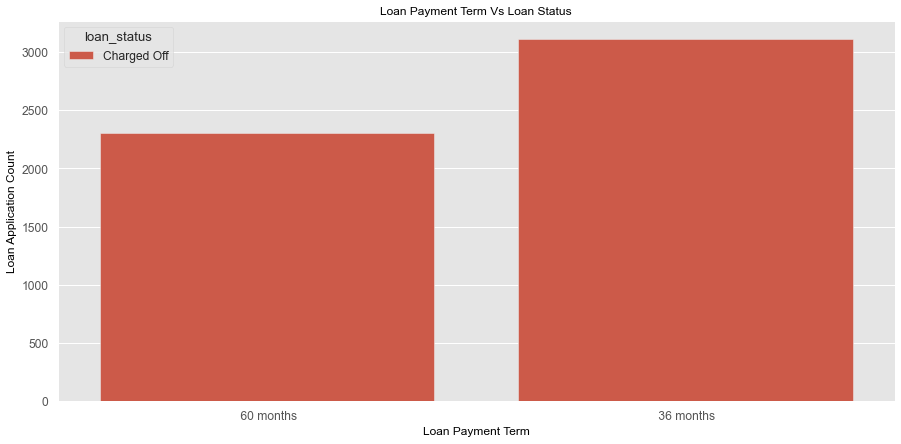

In [74]:
# Bivariate Analysis - Loan Status and Loan Paying Term

plt.figure(figsize=[15,7])
plt.style.use("ggplot")
sns.countplot(x="term",data=loan_ChargedOff,hue='loan_status')
plt.title('Loan Payment Term Vs Loan Status',fontsize=12,color='Black')
plt.xlabel('Loan Payment Term',fontsize=12,color = 'Black')
plt.ylabel('Loan Application Count',fontsize=12,color = 'Black')      
plt.show()

# Analysis -
# Mostly defaulters have taken loan to repay in 36 months.

#### Mostly defaulters have taken loan to repay in 36 months.

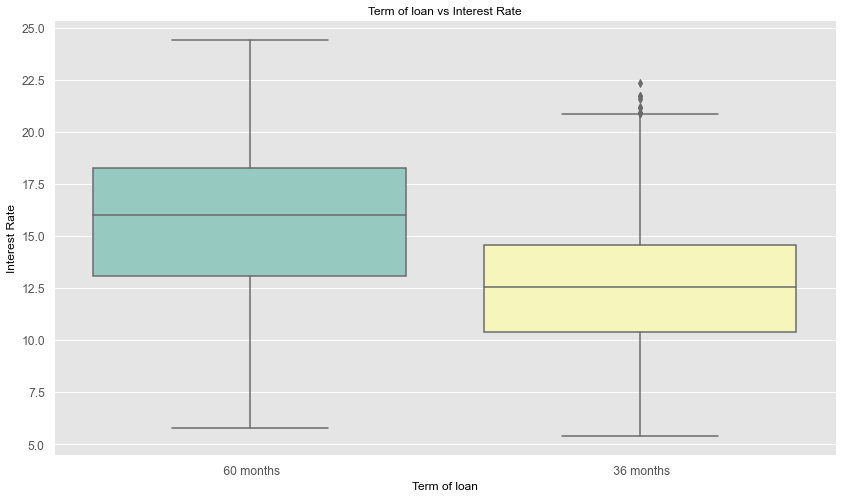

In [76]:
# Term of loan vs Interest Rate: Box Plot

plt.subplots(figsize=[14, 8])
plt.title('Term of loan vs Interest Rate',fontsize=12,color = 'Black')
sns.boxplot(y='int_rate', x='term', data =loan_ChargedOff, palette="Set3")
plt.ylabel('Interest Rate',fontsize=12,color = 'Black')
plt.xlabel('Term of loan',fontsize=12,color = 'Black')
plt.show()

# Analysis -
# Defaulter who have taken loan for high interest rate for 60 months.

#### Defaulter who have taken loan for high interest rate for 60 months.

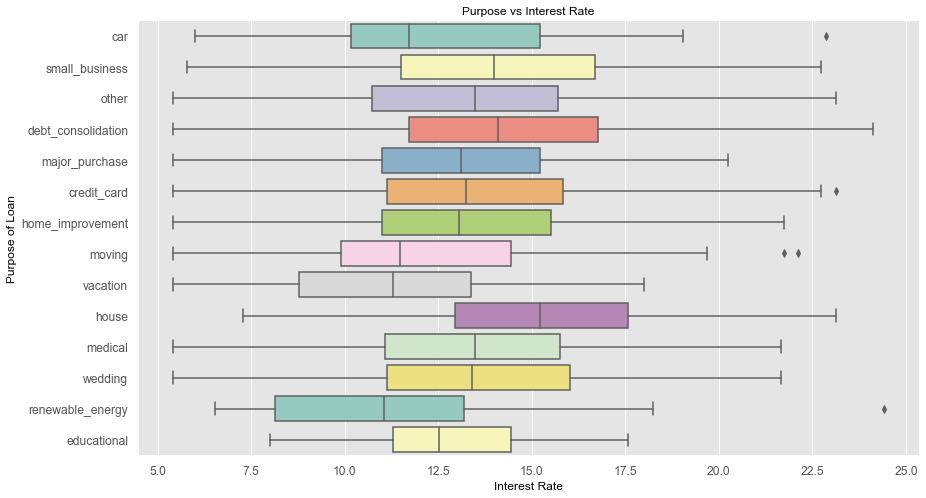

In [77]:
# Purpose vs Interest Rate: Box Plot
plt.subplots(figsize=[14, 8])
plt.title('Purpose vs Interest Rate',fontsize=12,color = 'Black')
sns.boxplot(y='purpose', x='int_rate', data =loan_ChargedOff, palette="Set3")
plt.ylabel('Purpose of Loan',fontsize=12,color = 'Black')
plt.xlabel('Interest Rate',fontsize=12,color = 'Black')
plt.show()

# Analysis -
# Applicants who have got house loan for high interent house, they are mostly defaulters.

#### Applicants who have got house loan for high interent house, they are mostly defaulters.

In [78]:
# Purpose of Loan against Charged off Proportion.
purpose_of_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
purpose_of_loan['Total'] = purpose_of_loan['Charged Off'] + purpose_of_loan['Fully Paid'] 
purpose_of_loan['Charged_off_proportion'] = purpose_of_loan['Charged Off'] / purpose_of_loan['Total']
purpose_of_loan.sort_values('Charged_off_proportion', ascending=False)

# Analysis -
# small Business applicants have high chances of getting charged off.

loan_status,purpose,Charged Off,Fully Paid,Total,Charged_off_proportion
11,small_business,454,1169,1623,0.279729
10,renewable_energy,18,77,95,0.189474
3,educational,54,258,312,0.173077
8,moving,90,460,550,0.163636
9,other,605,3094,3699,0.163558
5,house,55,283,338,0.162722
7,medical,104,537,641,0.162246
2,debt_consolidation,2677,14628,17305,0.154695
12,vacation,52,313,365,0.142466
4,home_improvement,322,2234,2556,0.125978


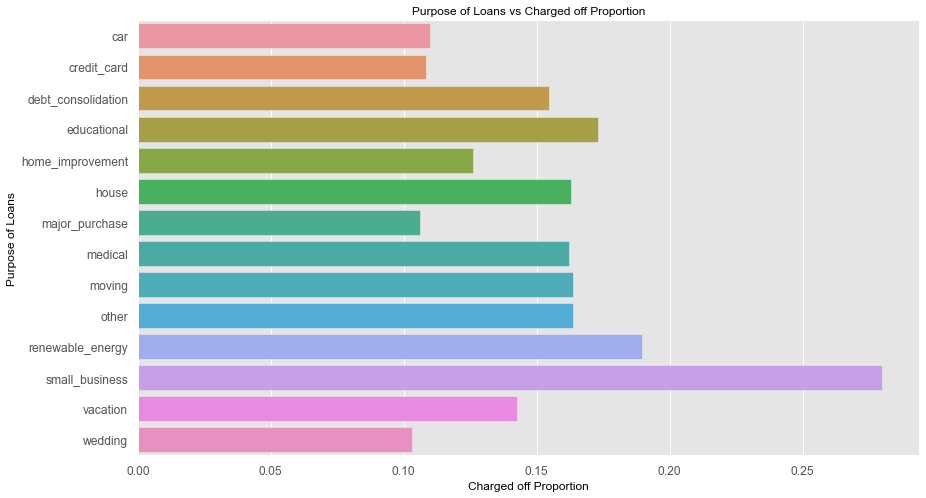

In [79]:
# Visualized the pattern through bar plot for Purpose of Loan against Charged off Proportion
plt.subplots(figsize=[14, 8])
plt.title('Purpose of Loans vs Charged off Proportion',fontsize=12,color = 'Black')
sns.barplot(y='purpose', x='Charged_off_proportion', data=purpose_of_loan)
plt.ylabel('Purpose of Loans',fontsize=12,color = 'Black')
plt.xlabel('Charged off Proportion',fontsize=12,color = 'Black')
plt.show()

# Analysis -
# small Business applicants have high chances of getting charged off.

#### small Business applicants have high chances of getting charged off.

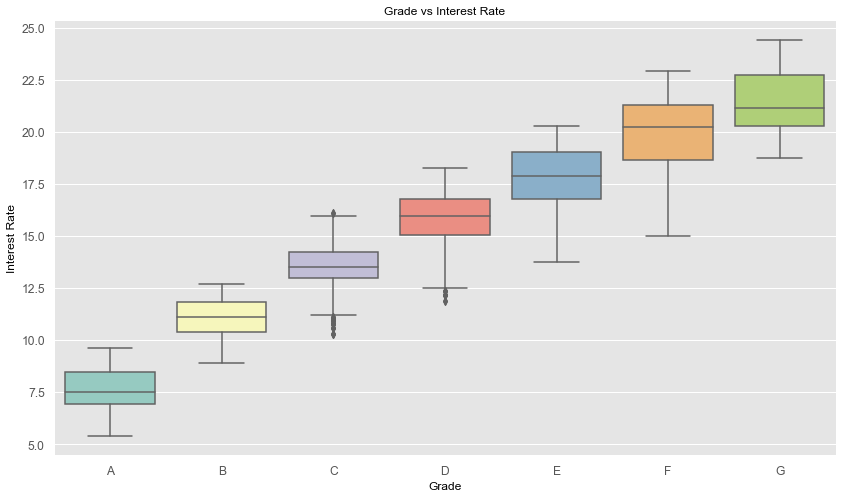

In [80]:
# Grade vs Interest Rate: Box Plot

plt.subplots(figsize=[14, 8])
plt.title('Grade vs Interest Rate',fontsize=12,color = 'Black')
sns.boxplot(y='int_rate', x='grade', data =loan_ChargedOff, palette="Set3", order = 'ABCDEFG')
plt.ylabel('Interest Rate',fontsize=12,color = 'Black')
plt.xlabel('Grade',fontsize=12,color = 'Black')
plt.show()

# Analysis -
# Lenders issue A-grade to defaulters with low interest rate.
# Interest rate is increasing with grades moving from A to F.

- Lenders issue A-grade to defaulters with low interest rate.
- Interest rate is increasing with grades moving from A to F.

## Derived Columns For Analysis

In [81]:
# Derived columns: month and year columns
loan['issue_m'] = loan['issue_d'].apply(lambda x: x.split("-")[0])#month
loan['issue_y'] = loan['issue_d'].apply(lambda x: x.split("-")[1])#year
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies,issue_m,issue_y
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,0,13648,83.7,9,0,0,5833.84,0.0,Dec,11
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,0,1687,9.4,4,0,0,1008.71,0.0,Dec,11
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,0,2956,98.5,10,0,0,3005.67,0.0,Dec,11
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,0,5598,21.0,37,0,0,12231.89,0.0,Dec,11
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,0,7963,28.3,12,0,0,5632.21,0.0,Dec,11


In [82]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies
count,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36606.000000,36654.000000,36654.000000,36654.000000
mean,10682.249550,10436.144077,9894.181349,11.888080,311.888682,4.883805,60855.751621,13.446725,48.659741,21.641349,10869.463173,0.043897
std,7048.414166,6800.636737,6730.756232,3.667257,199.230096,3.443279,27750.284125,6.661899,28.282836,11.232836,8302.146201,0.205533
min,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5000.000000,5000.000000,4975.000000,8.940000,163.080000,2.000000,40000.000000,8.350000,25.300000,13.000000,4897.045000,0.000000
50%,9250.000000,9000.000000,8375.000000,11.710000,270.420000,4.000000,56000.000000,13.580000,49.000000,20.000000,8807.575000,0.000000
75%,15000.000000,14400.000000,13623.731415,14.270000,408.480000,8.000000,77970.500000,18.710000,72.100000,28.000000,14766.850000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,140004.000000,29.990000,99.900000,90.000000,58563.680000,2.000000


In [83]:
# Derived columns
# create bins for loan_amnt range
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k'])

# create bins for annual_inc range
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], [0, 25000, 50000, 75000, 100000, 125000, 150000], labels=['0-25k', '25k-50k', '50k-75k', '75k-1Lakh', '1-1.25Lakh', '1.25Lakh+'])

# create bins for int_rate range
loan['int_rate_range'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 15, 17.5, 20, 25], labels=['0-10', '10-12.5', '12.5-15', '15-17.5', '17.5-20', '20+'])

# create bins for dti range
loan['dti_range'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20', '20-25', '25+'])

# create bins for installment range
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])

# create bins for Funded Amount for Investment range
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

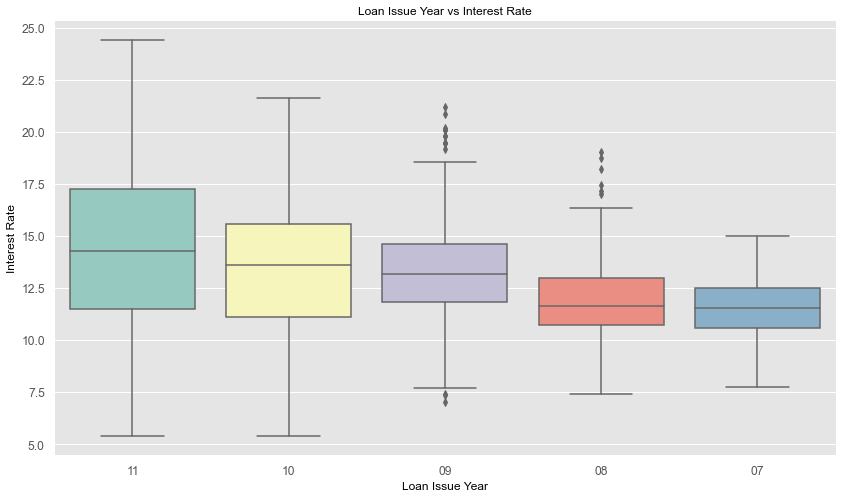

In [84]:
# Year vs Interest Rate using Box Plot
plt.subplots(figsize=[14, 8])
plt.title('Loan Issue Year vs Interest Rate',fontsize=12,color = 'Black')
sns.boxplot(y='int_rate', x=loan['issue_y'], data =loan_ChargedOff, palette="Set3")
plt.ylabel('Interest Rate',fontsize=12,color = 'Black')
plt.xlabel('Loan Issue Year',fontsize=12,color = 'Black')
plt.show()

# Analysis -
# Intrest rate is increasing slowly with increase in year for defaulters.

#### Intrest rate is increasing slowly with increase in year for defaulters.

In [85]:
# Annual income against Charged off Proportion

inc_range_vs_loan = loan.groupby(['annual_inc_range', 'loan_status']).loan_status.count().unstack().reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Charged_off_proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Charged_off_proportion', ascending=False)

loan_status,annual_inc_range,Charged Off,Fully Paid,Total,Charged_off_proportion
0,0-25k,488,2062,2550,0.191373
1,25k-50k,2125,10714,12839,0.165511
2,50k-75k,1686,9982,11668,0.144498
3,75k-1Lakh,736,5303,6039,0.121874
4,1-1.25Lakh,293,2402,2695,0.108720
5,1.25Lakh+,90,773,863,0.104287


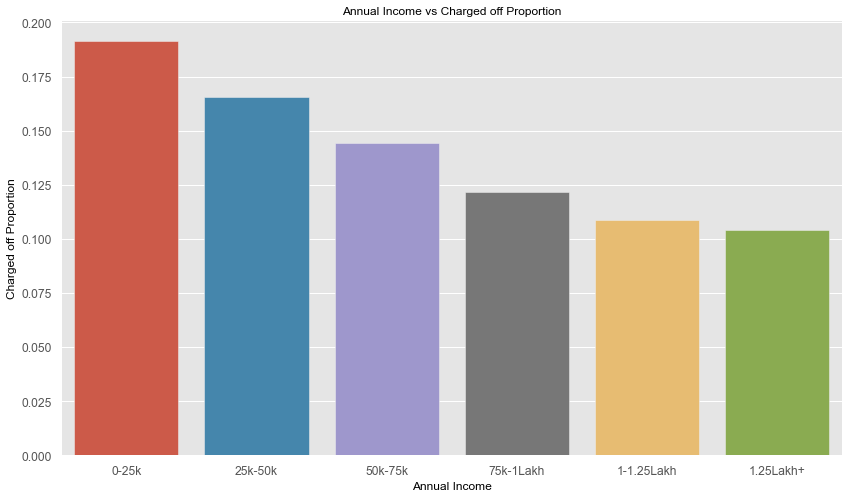

In [86]:
# Visualized the pattern through bar plot for Annual Income against Charged off Proportion
plt.subplots(figsize=[14, 8])
plt.title('Annual Income vs Charged off Proportion',fontsize=12,color = 'Black')
sns.barplot(y='Charged_off_proportion', x='annual_inc_range', data=inc_range_vs_loan)
plt.ylabel('Charged off Proportion',fontsize=12,color = 'Black')
plt.xlabel('Annual Income',fontsize=12,color = 'Black')
plt.show()

# Analysis -
# Income range 1.25+ has less chances of charged off.
# Income range 0-20k has high chances of charged off.
# Charged off proportion is decreasing with increasing annual income.

- Income range 1.25+ has less chances of charged off.
- Income range 0-20k has high chances of charged off.
- Charged off proportion is decreasing with increasing annual income.

In [87]:
 # Interest rate against Charged off Proportion

interest_vs_loan = loan.groupby(['int_rate_range', 'loan_status']).loan_status.count().unstack().reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Charged_off_proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Charged_off_proportion', ascending=False)

loan_status,int_rate_range,Charged Off,Fully Paid,Total,Charged_off_proportion
5,20+,268,405,673,0.398217
4,17.5-20,573,1355,1928,0.297199
3,15-17.5,1133,3719,4852,0.233512
2,12.5-15,1437,7035,8472,0.169618
1,10-12.5,1195,7710,8905,0.134194
0,0-10,812,11012,11824,0.068674


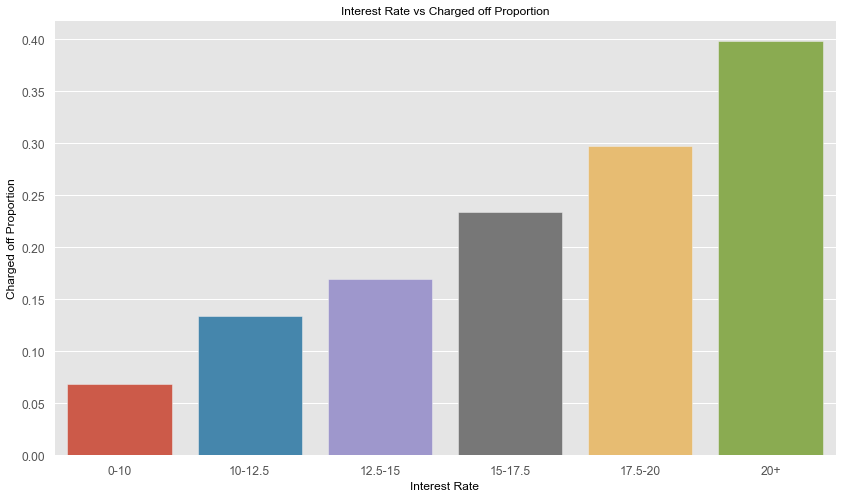

In [88]:
# Visualized the pattern through bar plot for Interest Rate against Charged off Proportioner.
plt.subplots(figsize=[14, 8])
plt.title('Interest Rate vs Charged off Proportion',fontsize=12,color = 'Black')
sns.barplot(y='Charged_off_proportion', x='int_rate_range', data=interest_vs_loan)
plt.ylabel('Charged off Proportion',fontsize=12,color = 'Black')
plt.xlabel('Interest Rate',fontsize=12,color = 'Black')
plt.show()

# Analysis -
# Interest rate less than 10% has very less chances of charged off.
# Interest rate more than 20+% has high chances of charged off.
# Charged off proportion is increasing with increasing interest rate.

- Interest rate less than 10% has very less chances of charged off.
- Interest rate more than 20+% has high chances of charged off.
- Charged off proportion is increasing with increasing interest rate.

In [89]:
# Public Bankruptcy Records against Charged off Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Charged_off_proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Charged_off_proportion', ascending=False)

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Charged_off_proportion
2,2.0,2,3,5,0.400000
1,1.0,361,1238,1599,0.225766
0,0.0,5055,29995,35050,0.144223


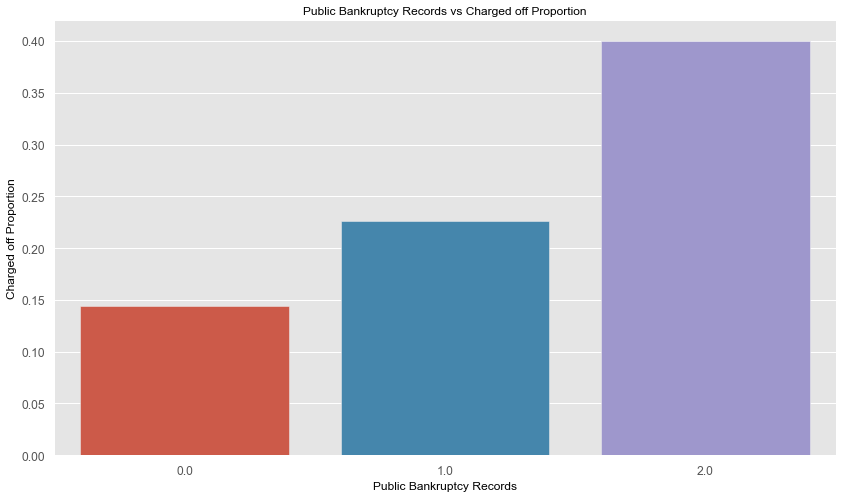

In [90]:
# Visualized the pattern through bar plot for Public Bankruptcy Records against Charged off Proportion.

plt.subplots(figsize=[14, 8])
plt.title('Public Bankruptcy Records vs Charged off Proportion',fontsize=12,color = 'Black')
sns.barplot(y='Charged_off_proportion', x='pub_rec_bankruptcies', data=bankruptcies_vs_loan)
plt.ylabel('Charged off Proportion',fontsize=12,color = 'Black')
plt.xlabel('Public Bankruptcy Records',fontsize=12,color = 'Black')
plt.show()

# Analysis -
# Applicants who have no Public Bankruptcy Records, have less chances of charged off.
# Applicants who have high Public Bankruptcy Records, have high chances of charged off.
# Chances of charged off is increasing with increasing Public Bankruptcy Records.

- Applicants who have no Public Bankruptcy Records, have less chances of charged off.
- Applicants who have high Public Bankruptcy Records, have high chances of charged off.
- Chances of charged off is increasing with increasing Public Bankruptcy Records.

In [91]:
# Verification Status against Charged off Proportion

verification_vs_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().reset_index()
verification_vs_loan['Total'] = verification_vs_loan['Charged Off'] + verification_vs_loan['Fully Paid'] 
verification_vs_loan['Charged_off_proportion'] = verification_vs_loan['Charged Off'] / verification_vs_loan['Total']
verification_vs_loan.sort_values('Charged_off_proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Charged_off_proportion
2,Verified,1949,9270,11219,0.173723
1,Source Verified,1373,7782,9155,0.149973
0,Not Verified,2096,14184,16280,0.128747


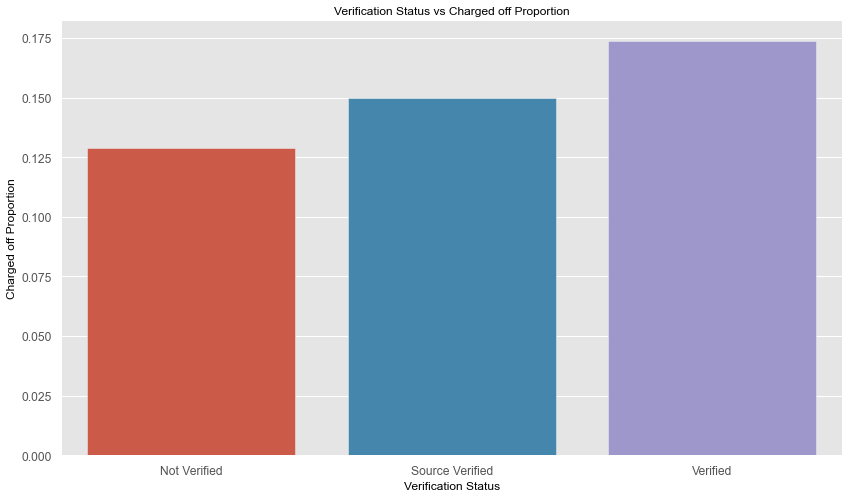

In [92]:
# Visualized the pattern through bar plot for Verification Status against Charged off Proportion.

plt.subplots(figsize=[14, 8])
plt.title('Verification Status vs Charged off Proportion',fontsize=12,color = 'Black')
sns.barplot(y='Charged_off_proportion', x='verification_status', data=verification_vs_loan)
plt.ylabel('Charged off Proportion',fontsize=12,color = 'Black')
plt.xlabel('Verification Status',fontsize=12,color = 'Black')
plt.show()

# Analysis -
# Verified appliants have high chances of charged off.
# No verified appliants have less chances of charged off.

- Verified appliants have high chances of charged off.
- No verified appliants have less chances of charged off.

In [93]:
# Employment length against Charged off Proportion

emplen_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Charged_off_proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Charged_off_proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Charged_off_proportion
0,0,225,789,1014,0.221893
10,10,1270,6618,7888,0.161004
7,7,252,1392,1644,0.153285
5,5,441,2603,3044,0.144875
1,1,1066,6304,7370,0.144640
8,8,194,1149,1343,0.144453
6,6,294,1779,2073,0.141823
3,3,536,3288,3824,0.140167
4,4,443,2757,3200,0.138437
2,2,547,3554,4101,0.133382


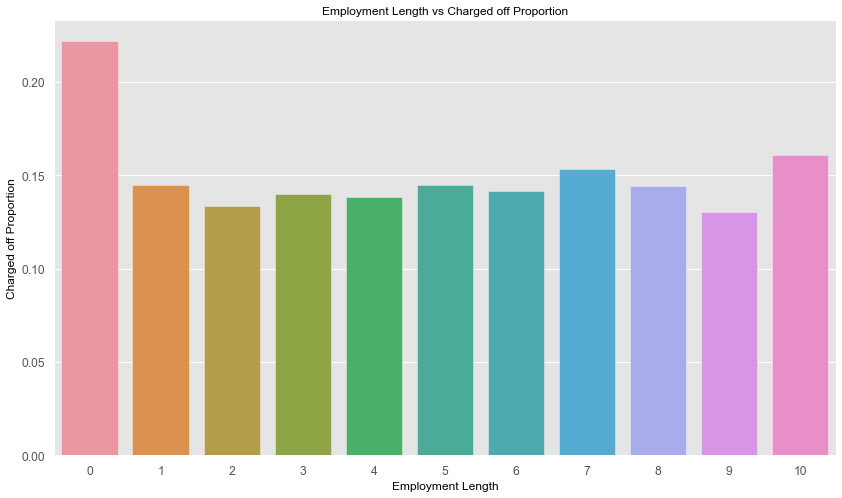

In [94]:
# Visualized the pattern through bar plot for Employment length against Charged off Proportion.
plt.subplots(figsize=[14, 8])
plt.title('Employment Length vs Charged off Proportion',fontsize=12,color = 'Black')
sns.barplot(y='Charged_off_proportion', x='emp_length', data=emplen_vs_loan)
plt.ylabel('Charged off Proportion',fontsize=12,color = 'Black')
plt.xlabel('Employment Length',fontsize=12,color = 'Black')
plt.show()

# Analysis -
# Applicants who are not working or have less than 1 year of work experience have high chances of getting charged off.
# Rest of applicants have more or less same chances of getting charged off.

- Applicants who are not working or have less than 1 year of work experience have high chances of getting charged off.
- Rest of applicants have more or less same chances of getting charged off.

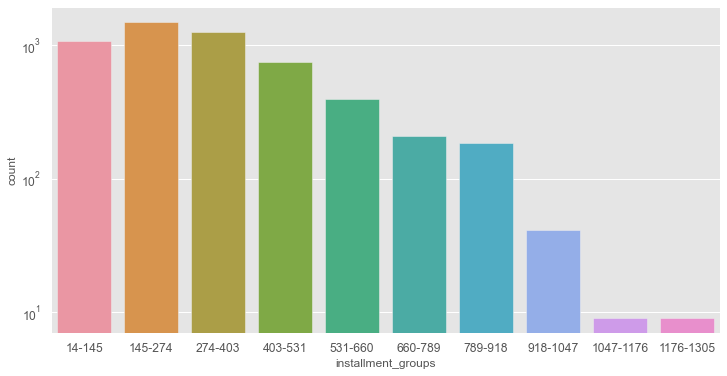

In [95]:
fig,ax = plt.subplots(figsize = (12,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

# Analysis -
# Applicants who have to pay loan in 145-274 instalments, they are mostly defaulters.

#### Applicants who have to pay loan in 145-274 instalments, they are mostly defaulters.

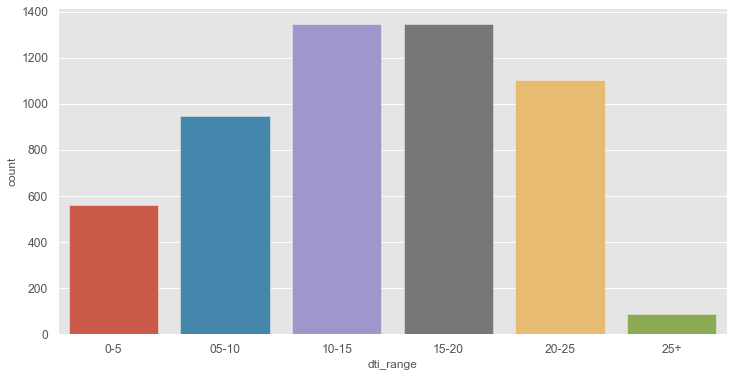

In [96]:
fig,ax = plt.subplots(figsize = (12,6))
sns.countplot(x='dti_range', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

# Analysis -
# Applicants who have DTI range 10-20, they are mostly defaulters.

#### Applicants who have DTI range of 10-20, they are mostly defaulters.

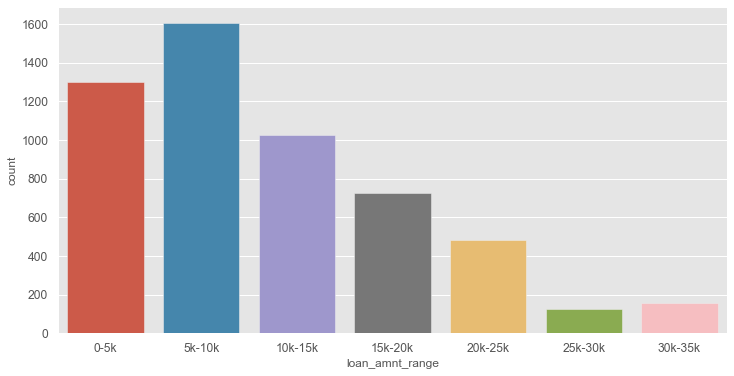

In [97]:
fig,ax = plt.subplots(figsize = (12,6))
sns.countplot(x='loan_amnt_range', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

# Analysis -
# Applicants who have got loan amount 5k-10k, they are mostly defaulters.

#### Applicants who have got loan amount 5k-10k, they are mostly defaulters.

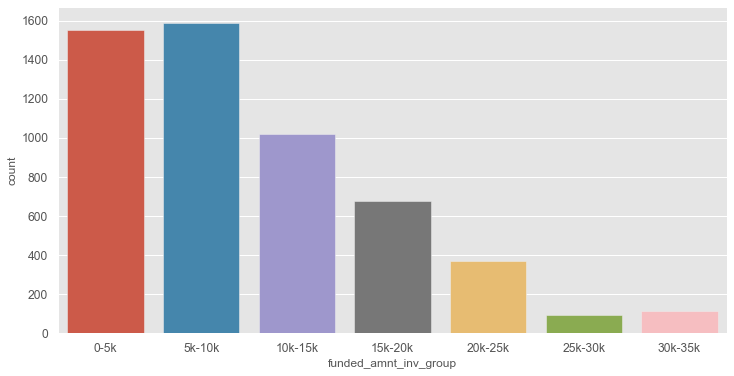

In [98]:
fig,ax = plt.subplots(figsize = (12,6))
sns.countplot(x='funded_amnt_inv_group', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

# Analysis -
# Applicants who have invested 5k-10k amount, they are mostly defaulters.

#### Applicants who have invested 5k-10k amount, they are mostly defaulters.

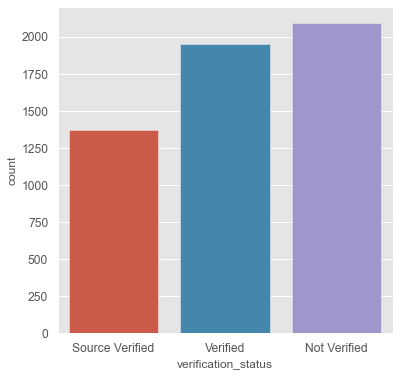

In [99]:
sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

# Analysis -
# Mostly defaulters applicant forms are not verified.

#### Mostly defaulters applicant forms are not verified.

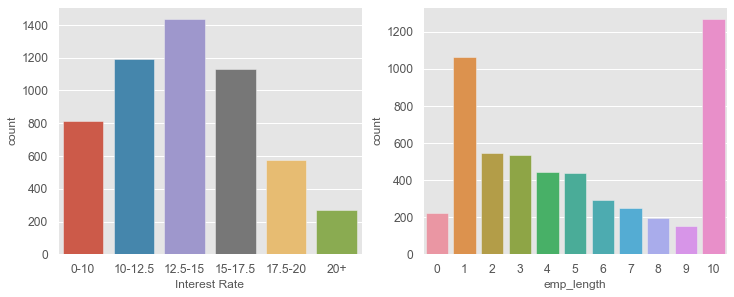

In [100]:
fig, ax = plt.subplots(figsize = (12,10))
plt.subplot(221)
sns.countplot(x='int_rate_range', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Charged Off'])
plt.show()

# Analysis -
# Clients who have got loan at interest rate of 12.5-15%, are mostly defaulters.
# Clients with employment length of 10 years and more than 10 years are mostly defaulters.

- Clients who have got loan at interest rate of 12.5-15%, are mostly defaulters.
- Clients with employement length of 10 years and more than 10 years are mostly defaulters.

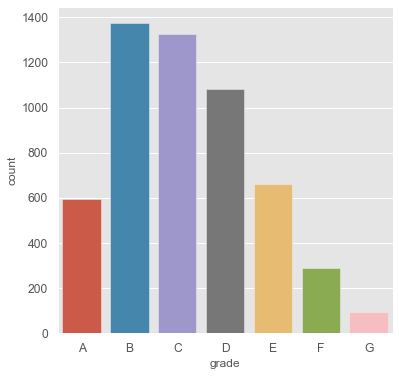

In [101]:
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

# Analysis - 
# Grade B Applicants are most defaulters in between all grades.

#### Grade B Applicants are most defaulters in between all grades.

## Multivariate Analysis

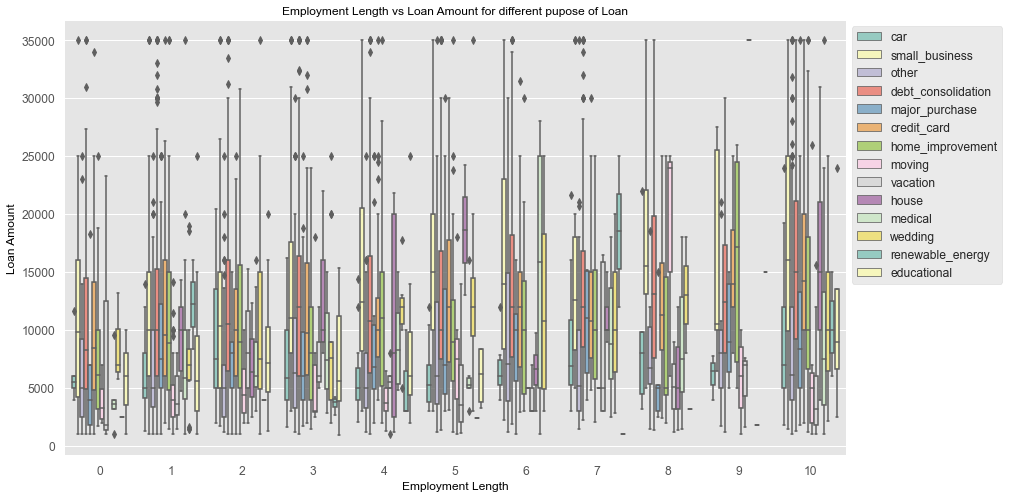

In [102]:
# Employment Length vs Loan Amount for different pupose of Loan

loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

plt.subplots(figsize=[14, 8])
plt.title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=12,color = 'Black')
sns.boxplot(y='loan_amnt', x='emp_length', hue= 'purpose', data =loanstatus, palette="Set3")
plt.ylabel('Loan Amount',fontsize=12,color = 'Black')
plt.xlabel('Employment Length',fontsize=12,color = 'Black')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# Analysis - 
# 10 and 10+ year Applicants have taken maximum number of loan.

# Conclusions
### The below insights and its category has more probability to be as defaulter

- Clients who under grade B
- Client who having home as Rent or Mortage
- Clients who has loan at interest rate of 12.5-15%
- Clients with employment  length of 10 years and more than 10 years
- when the loan asked for 'debt_consolidation'
- 36 months Term
- When funded amount by investor is between 5k-10k
- Loan amount is between 5k-10k
- Dti is between 10-20